# WeatherPy
----
#### Author: Felipe Murillo
#### Date: May 1, 2020
#### Description: Visualize weather of 500+ cities across the world of varying distance from the equator
#### Inputs:  OpenWeatherMap API (and corresponding key)
#### Output: ./output_data/cities.csv
----

### Install citipy module and setup dependencies

In [2]:
# Install citipy module
!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from config import api_key_openWeather

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

### Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []
city_lat = []
city_long = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
        city_lat.append(lat_lng[0])
        city_long.append(lat_lng[1])

# Print the city count to confirm sufficient count
len(cities)

622

In [17]:
# Create city weather dataFrame skeleton
city_weather_df = pd.DataFrame({"City":cities})
city_weather_df["City Name"] = ""
city_weather_df["Country"] = ""
city_weather_df["Lng"] = ""
city_weather_df["Lat"] = ""
city_weather_df["Max Temp (F)"] = ""
city_weather_df["Humidity (%)"]=""
city_weather_df["Cloudiness (%)"] = ""
city_weather_df["Wind Speed (mph)"] = ""

city_weather_df.head()

,City,City Name,Country,Lng,Lat,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,alta floresta,,,,,,,,
1,saskylakh,,,,,,,,
2,punta arenas,,,,,,,,
3,wanning,,,,,,,,
4,zhigansk,,,,,,,,


### Perform API Calls and store data into weather dataframe

In [18]:
# Base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Specify temperature in degrees Celsius rather than Kelvin
units = "imperial"

# Build base query URL
base_url = f"{url}appid={api_key_openWeather}&units={units}&q="

# Use for loop to cycle thru each city
for index, city in city_weather_df.iterrows():

    # Print to screen which city is currently being called
    print(f"Retrieving Results for index: {index}, city: {city.loc['City']}")
    
    # Construct query_url
    query_url = base_url + city.loc["City"]
    
    # Request weather data for desired city
    weather_request = requests.get(query_url).json()
     
    # Extract desired data: 
    # longitude, latitude, temperature (deg F), humidity (%), cloudiness (%), wind speed (mph)
    
    try:
        city_weather_df.loc[index, 'City Name'] = weather_request['name']
        city_weather_df.loc[index, 'Country'] = weather_request['sys']['country']  
        city_weather_df.loc[index, 'Lng'] = weather_request['coord']['lon']
        city_weather_df.loc[index, 'Lat'] = weather_request['coord']['lat']
        city_weather_df.loc[index, 'Max Temp (F)'] = weather_request['main']['temp_max']
        city_weather_df.loc[index, 'Humidity (%)'] = weather_request['main']['humidity']
        city_weather_df.loc[index, 'Cloudiness (%)'] = weather_request['clouds']['all']
        city_weather_df.loc[index, 'Wind Speed (mph)'] = weather_request['wind']['speed']
        
    except (KeyError, IndexError):
        print("City Not Found... skipping.")
        
    print("------------")

Retrieving Results for index: 0, city: alta floresta
------------
Retrieving Results for index: 1, city: saskylakh
------------
Retrieving Results for index: 2, city: punta arenas
------------
Retrieving Results for index: 3, city: wanning
------------
Retrieving Results for index: 4, city: zhigansk
------------
Retrieving Results for index: 5, city: los llanos de aridane
------------
Retrieving Results for index: 6, city: kayerkan
------------
Retrieving Results for index: 7, city: hermanus
------------
Retrieving Results for index: 8, city: sinjah
City Not Found... skipping.
------------
Retrieving Results for index: 9, city: poshekhonye
------------
Retrieving Results for index: 10, city: seymchan
------------
Retrieving Results for index: 11, city: east london
------------
Retrieving Results for index: 12, city: kilosa
------------
Retrieving Results for index: 13, city: broome
------------
Retrieving Results for index: 14, city: tasiilaq
------------
Retrieving Results for index: 

------------
Retrieving Results for index: 129, city: clyde river
------------
Retrieving Results for index: 130, city: saleaula
City Not Found... skipping.
------------
Retrieving Results for index: 131, city: nikolskoye
------------
Retrieving Results for index: 132, city: save
------------
Retrieving Results for index: 133, city: cidreira
------------
Retrieving Results for index: 134, city: nyurba
------------
Retrieving Results for index: 135, city: kenai
------------
Retrieving Results for index: 136, city: atuona
------------
Retrieving Results for index: 137, city: cape town
------------
Retrieving Results for index: 138, city: mandan
------------
Retrieving Results for index: 139, city: norman wells
------------
Retrieving Results for index: 140, city: antalaha
------------
Retrieving Results for index: 141, city: padang
------------
Retrieving Results for index: 142, city: kuryk
------------
Retrieving Results for index: 143, city: igarka
------------
Retrieving Results for i

------------
Retrieving Results for index: 252, city: aksarka
------------
Retrieving Results for index: 253, city: rawannawi
City Not Found... skipping.
------------
Retrieving Results for index: 254, city: georgetown
------------
Retrieving Results for index: 255, city: nsanje
------------
Retrieving Results for index: 256, city: lasa
------------
Retrieving Results for index: 257, city: nishihara
------------
Retrieving Results for index: 258, city: terra santa
------------
Retrieving Results for index: 259, city: batagay
------------
Retrieving Results for index: 260, city: hirara
------------
Retrieving Results for index: 261, city: jabiru
City Not Found... skipping.
------------
Retrieving Results for index: 262, city: lorengau
------------
Retrieving Results for index: 263, city: namwala
------------
Retrieving Results for index: 264, city: barrow
------------
Retrieving Results for index: 265, city: abnub
------------
Retrieving Results for index: 266, city: oranjemund
--------

------------
Retrieving Results for index: 376, city: alice springs
------------
Retrieving Results for index: 377, city: hoquiam
------------
Retrieving Results for index: 378, city: akure
------------
Retrieving Results for index: 379, city: beatrice
------------
Retrieving Results for index: 380, city: lamu
------------
Retrieving Results for index: 381, city: sayyan
------------
Retrieving Results for index: 382, city: caravelas
------------
Retrieving Results for index: 383, city: zhangye
------------
Retrieving Results for index: 384, city: gourdon
------------
Retrieving Results for index: 385, city: burica
City Not Found... skipping.
------------
Retrieving Results for index: 386, city: tondano
------------
Retrieving Results for index: 387, city: kingaroy
------------
Retrieving Results for index: 388, city: calituban
------------
Retrieving Results for index: 389, city: lubango
------------
Retrieving Results for index: 390, city: mpanda
------------
Retrieving Results for in

------------
Retrieving Results for index: 501, city: kuche
City Not Found... skipping.
------------
Retrieving Results for index: 502, city: cody
------------
Retrieving Results for index: 503, city: chapais
------------
Retrieving Results for index: 504, city: pimentel
------------
Retrieving Results for index: 505, city: vestmanna
------------
Retrieving Results for index: 506, city: roald
------------
Retrieving Results for index: 507, city: puerto del rosario
------------
Retrieving Results for index: 508, city: suntar
------------
Retrieving Results for index: 509, city: nanning
------------
Retrieving Results for index: 510, city: birjand
------------
Retrieving Results for index: 511, city: leshukonskoye
------------
Retrieving Results for index: 512, city: flinders
------------
Retrieving Results for index: 513, city: marcona
City Not Found... skipping.
------------
Retrieving Results for index: 514, city: zaysan
------------
Retrieving Results for index: 515, city: qaqortoq
-

In [19]:
# Ensure dataframe is being populated correctly.
# Note: Cities not found will not be populated. Corresponding indices will be removed in the next step.
city_weather_df.head()

,City,City Name,Country,Lng,Lat,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,alta floresta,Alta Floresta,BR,-56.09,-9.88,89.6,52,20,10.29
1,saskylakh,Saskylakh,RU,114.08,71.92,11.32,95,88,4.56
2,punta arenas,Punta Arenas,CL,-70.92,-53.15,48.2,76,40,9.17
3,wanning,Wanning,CN,110.4,18.8,74.64,87,19,6.82
4,zhigansk,Zhigansk,RU,123.37,66.77,20.55,97,100,7.99


In [20]:
# Ensure all items are in dataframe
len(city_weather_df.index)

622

In [21]:
# Remove cities that were not found in the OpenWeather query
city_weather_df = city_weather_df[city_weather_df["City Name"] != ""]
city_weather_df.head()

,City,City Name,Country,Lng,Lat,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,alta floresta,Alta Floresta,BR,-56.09,-9.88,89.6,52,20,10.29
1,saskylakh,Saskylakh,RU,114.08,71.92,11.32,95,88,4.56
2,punta arenas,Punta Arenas,CL,-70.92,-53.15,48.2,76,40,9.17
3,wanning,Wanning,CN,110.4,18.8,74.64,87,19,6.82
4,zhigansk,Zhigansk,RU,123.37,66.77,20.55,97,100,7.99


In [22]:
# Ensure empty rows were removed
len(city_weather_df.index)

565

### Export data frame into CSV

In [33]:
# Add dependincies
import os

# Exporting rertrieved data to CSV (to avoid making another resource consuming request)
output =  os.path.join("output_data","cities.csv")

# If the Output folder does not exist, create it; if it does, use it!
os.makedirs(os.path.dirname(output), exist_ok=True)

# Write output to csv file and close it when done
city_weather_df.to_csv(output)

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

In [34]:
# Create a scatter plot function
def weather_scat(title,x_term,y_term,x_label,y_label,color):
    t = time.localtime()
    current_time = time.strftime("%b %d %Y %H:%M:%S", t)
    x_series = city_weather_df[x_term]
    y_series = city_weather_df[y_term]
    plt.scatter(x_series,
                y_series,
                marker="o",
                edgecolors='black',
                color = color
               )
    plt.title(f"{title}\n({current_time})",fontweight="bold")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.grid(alpha = 0.25)
    plt.savefig("output_data/"+title+".png")

#### Latitude vs. Temperature Plot

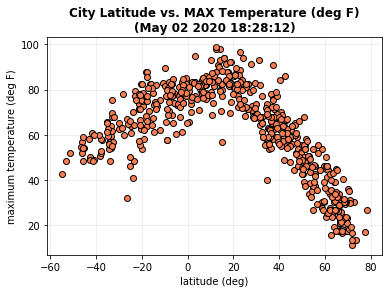

In [35]:
plot_title = "City Latitude vs. MAX Temperature (deg F)"

weather_scat(plot_title,
             "Lat",
             "Max Temp (F)",
             "latitude (deg)",
             "maximum temperature (deg F)",
             "coral")
plt.show()

##### <font color = blue>This plot shows that hotter temperatures occur near the equator and tropics, getting colder around the poles (closer to +90, -90 deg lattitude)</font>

#### Latitude vs. Humidity Plot

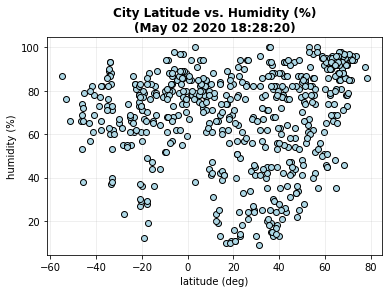

In [36]:
plot_title = "City Latitude vs. Humidity (%)"

weather_scat(plot_title,
             "Lat",
             "Humidity (%)",
             "latitude (deg)",
             "humidity (%)",
             "LightBlue")
plt.show()

##### <font color = blue>This plot shows a small cluster of high humidity occuring at the equator and at a latitude = 65 deg</font>

#### Latitude vs. Cloudiness Plot

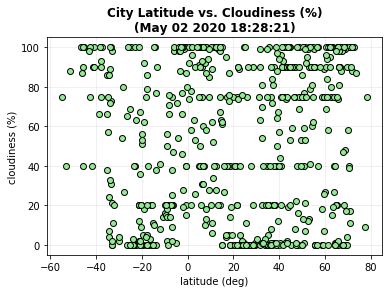

In [37]:
plot_title = "City Latitude vs. Cloudiness (%)"

weather_scat(plot_title,
             "Lat",
             "Cloudiness (%)",
             "latitude (deg)",
             "cloudiness (%)",
             "LightGreen")
plt.show()

##### <font color = blue>This plot shows how cloudiness is not predicatable by city latitude</font>

#### Latitude vs. Wind Speed Plot

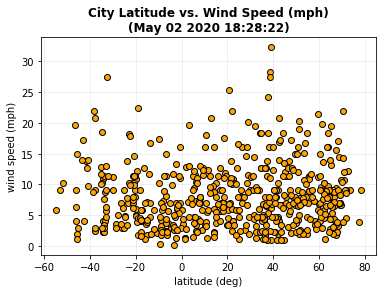

In [38]:
plot_title = "City Latitude vs. Wind Speed (mph)"

weather_scat(plot_title,
             "Lat",
             "Wind Speed (mph)",
             "latitude (deg)",
             "wind speed (mph)",
             "orange")
plt.show()

##### <font color = blue>This plot shows that the average wind speed around the world is between 0 to 10 mph</font>

## Linear Regression

In [39]:
# Load data set
city_weather_df = pd.read_csv("output_data/cities.csv")
city_weather_df.head()

,Unnamed: 0,Unnamed: 0.1,City,City Name,Country,Lng,Lat,Max Temp (F),Humidity (%),Cloudiness (%),Wind Speed (mph)
0,0,0,alta floresta,Alta Floresta,BR,-56.09,-9.88,89.60,52.0,20.0,10.29
1,1,1,saskylakh,Saskylakh,RU,114.08,71.92,11.32,95.0,88.0,4.56
2,2,2,punta arenas,Punta Arenas,CL,-70.92,-53.15,48.20,76.0,40.0,9.17
3,3,3,wanning,Wanning,CN,110.40,18.80,74.64,87.0,19.0,6.82
4,4,4,zhigansk,Zhigansk,RU,123.37,66.77,20.55,97.0,100.0,7.99


In [40]:
# Create a function to create Linear Regression plots
def make_regress_plots(title,x_term,y_term,x_label,y_label,x_annotate,y_annotate):
    t = time.localtime()
    current_time = time.strftime("%b %d %Y %H:%M:%S", t)
    x_values = x_term
    y_values = y_term
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept

    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    
    plt.scatter(x_values,
                y_values,
                marker="o",
                color="lightslategrey",
                alpha = 0.5)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(x_annotate,y_annotate),fontsize=15,color="red")
    plt.title(f"{title}\n{current_time}\n($r^2$ = {round(rvalue**2,5)})",fontweight="bold")
    plt.grid()
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.savefig("output_data/"+title+".png")

In [41]:
# Create Northern and Southern Hemisphere DataFrames
north_hemi = city_weather_df.loc[city_weather_df["Lat"] > 0]
south_hemi = city_weather_df.loc[city_weather_df["Lat"] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

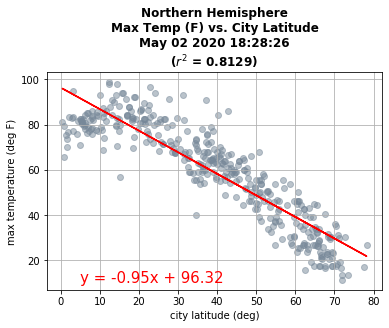

In [42]:
title ="Northern Hemisphere\nMax Temp (F) vs. City Latitude"
make_regress_plots(title,
                   north_hemi["Lat"],
                   north_hemi["Max Temp (F)"],
                   "city latitude (deg)",
                   "max temperature (deg F)",
                   5,
                   10
                  )
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

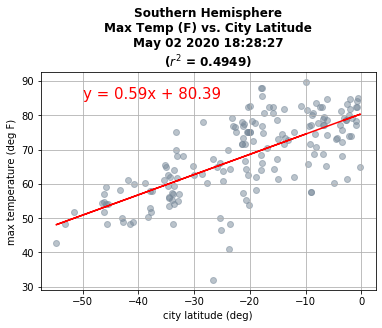

In [43]:
title ="Southern Hemisphere\nMax Temp (F) vs. City Latitude"
make_regress_plots(title,
                   south_hemi["Lat"],
                   south_hemi["Max Temp (F)"],
                   "city latitude (deg)",
                   "max temperature (deg F)",
                   -50,
                   85
                  )
plt.show()

##### <font color = blue>The plots above show that a city's max temperature is strongly correlated to its geographical latitude in the northern hemisphere, and moderately correlated in the southern hemisphere. The farther you move away from the equator, the cooler the temperatures get.</font>

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

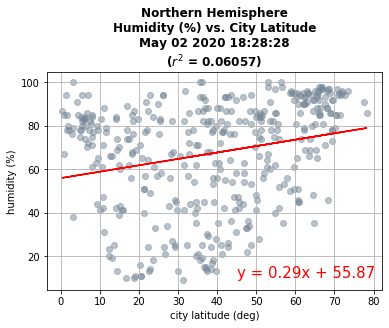

In [44]:
title ="Northern Hemisphere\nHumidity (%) vs. City Latitude"
make_regress_plots(title,
                   north_hemi["Lat"],
                   north_hemi["Humidity (%)"],
                   "city latitude (deg)",
                   "humidity (%)",
                   45,
                   10
                  )
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

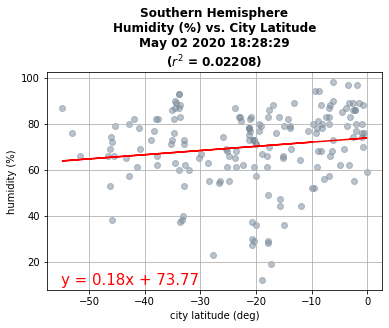

In [45]:
title ="Southern Hemisphere\nHumidity (%) vs. City Latitude"
make_regress_plots(title,
                   south_hemi["Lat"],
                   south_hemi["Humidity (%)"],
                   "city latitude (deg)",
                   "humidity (%)",
                   -55,
                   10
                  )
plt.show()

##### <font color = blue>The plots above show that a city's humidity is not correlated to its geographical latitude.</font>
    
##### <font color = blue>From the regression lines, humidity slightly increases in the northern hemisphere away from the equator. In the southern hemishere, the opposite is observed, with himidity slightly decreasing as you move towards the south pole.</font>

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

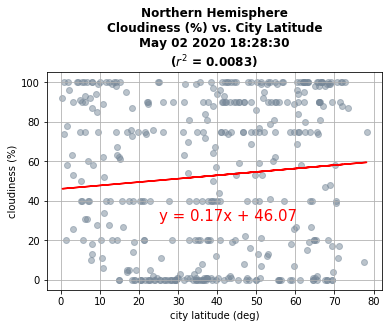

In [46]:
title ="Northern Hemisphere\nCloudiness (%) vs. City Latitude"
make_regress_plots(title,
                   north_hemi["Lat"],
                   north_hemi["Cloudiness (%)"],
                   "city latitude (deg)",
                   "cloudiness (%)",
                   25,
                   30
                  )
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

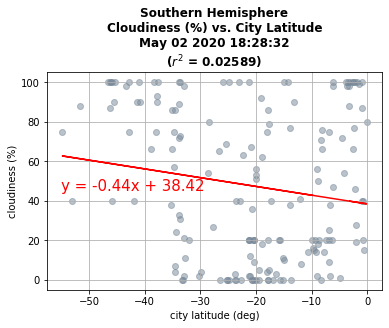

In [47]:
title ="Southern Hemisphere\nCloudiness (%) vs. City Latitude"
make_regress_plots(title,
                   south_hemi["Lat"],
                   south_hemi["Cloudiness (%)"],
                   "city latitude (deg)",
                   "cloudiness (%)",
                   -55,
                   45
                  )
plt.show()

##### <font color = blue>The plots above show that a city's level of cloudiness is not correlated to its geographical latitude.</font>
    
##### <font color = blue>From the regression lines, in both northern and southern hemispheres, cities are less cloudy as their latitude near the equator.</font>

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

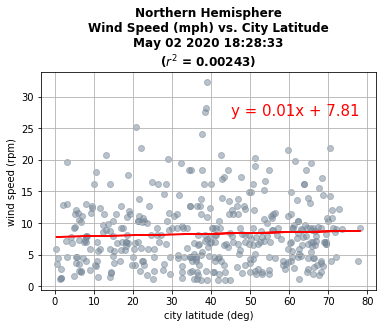

In [48]:
title ="Northern Hemisphere\nWind Speed (mph) vs. City Latitude"
make_regress_plots(title,
                   north_hemi["Lat"],
                   north_hemi["Wind Speed (mph)"],
                   "city latitude (deg)",
                   "wind speed (rpm)",
                   45,
                   27
                  )
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

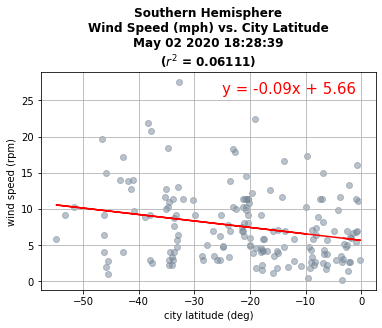

In [49]:
title ="Southern Hemisphere\nWind Speed (mph) vs. City Latitude"
make_regress_plots(title,
                   south_hemi["Lat"],
                   south_hemi["Wind Speed (mph)"],
                   "city latitude (deg)",
                   "wind speed (rpm)",
                   -25,
                   26
                  )
plt.show()

##### <font color = blue>The plots above show that a city's wind speed is not correlated to its geographical latitude.</font>
    
##### <font color = blue>From the regression lines, cities in the southern hemisphere do observe an increase in wind speeds as they move away from the equator.</font>